In [157]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot  as plt
import seaborn as sb
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import pylab as pl
from itertools import tee
from datetime import datetime
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats import weightstats as stests
from scipy.stats import jarque_bera
from scipy.stats import shapiro
from scipy.special import factorial
import math

In [300]:
#Q1
print("Probability that exactly 10 customers will complain about the purchased products-",round(((stats.binom.pmf(10,30,0.20))*100),2),"%")

Probability that exactly 10 customers will complain about the purchased products- 3.55 %


In [301]:
#Q2
prob= {}
lst=()
for i in range(16):
    prob[i] = round(((stats.binom.pmf(i,30,0.20))*100),2)
print(prob)    

{0: 0.12, 1: 0.93, 2: 3.37, 3: 7.85, 4: 13.25, 5: 17.23, 6: 17.95, 7: 15.38, 8: 11.06, 9: 6.76, 10: 3.55, 11: 1.61, 12: 0.64, 13: 0.22, 14: 0.07, 15: 0.02}


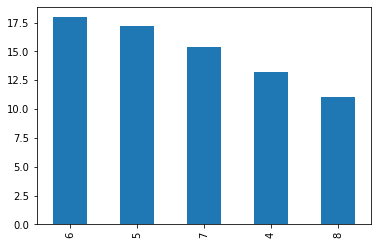

In [302]:
max_prob= pd.Series(prob.values(),index=prob.keys())
max_prob.nlargest(5).plot(kind='bar')
plt.show()

In [303]:
#Q3
prob_max10= {}
n=0
for i in range(11):
    prob_max10[i] = round(((stats.binom.pmf(i,30,0.20))*100),2)
    
for i in prob_max10.values():
    n=i+n
    
print("The probability that maximum of 10 customers will complain about the fruits purchased by them",n,"%")

The probability that maximum of 10 customers will complain about the fruits purchased by them 97.45 %


In [304]:
#Q4
prob_more10= {}
n=0
for i in range(11,31):
    prob_more10[i] = round(((stats.binom.pmf(i,30,0.20))*100),2)
    
for i in prob_more10.values():
    n=i+n
    
print("The probability that more than 10 customers will complain about the fruits purchased by them",n,"%")

The probability that more than 10 customers will complain about the fruits purchased by them 2.56 %


In [305]:
#Q5
prob_mean= {}
n=0
v=0
for i in range(31):
    prob_mean[i] = stats.binom.pmf(i,30,0.20)

for i,j in zip(prob_mean.keys(),prob_mean.values()):
    n=(i*j)+n

print("The average number of customers who are likely to complain about the fruits-",round(n,2),'%')

for i,j in zip(prob_mean.keys(),prob_mean.values()):
    v=(((i-n)**2)*j)+v
    
print("The variance of the number of complaints.-",round(v,2),'%')


The average number of customers who are likely to complain about the fruits- 6.0 %
The variance of the number of complaints.- 4.8 %


**The number of customer returns in a retail chain per day follows a poisson distribution at a rate of 25 returns per day.**


In [306]:
#Q6
prob_poisson=round(((stats.poisson.cdf(30,25))*100),2)
print("The probability that the number of returns exceeds 30 in a day-",prob_poisson,'%')


The probability that the number of returns exceeds 30 in a day- 86.33 %


In [307]:
#Q7
mean=95
var=10
X=102
std=(var)**(1/2)

z=(X-mean)/std
print("ZScore-",z)

ZScore- 2.2135943621178655


In [308]:
#Q8
mean = 3
x=1
prob= (mean**x)*(math.exp(-mean))/(factorial(3,exact=False))
print('The probability that on a day exactly 1 accident will happen',round(prob*100,2),'%')

The probability that on a day exactly 1 accident will happen 2.49 %


The shapiro test statistic is 0.9307892322540283  and its p-value is 0.0009826880414038897
The jarque_bera test statistic is 8.622083973391497  and its p-value is 0.013419559304405193


C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

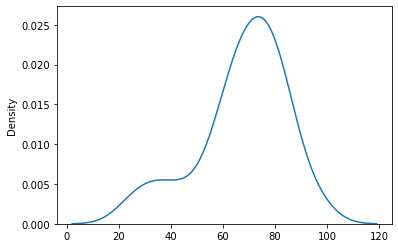

In [309]:
#Q9
dist=[75, 97, 70, 25, 80, 40, 82, 72, 82, 46, 72, 64, 24, 66, 78, 34, 37,64, 75, 94, 76, 96, 88, 37, 29, 51, 67, 45, 69, 59, 81, 66, 30, 52,66, 85, 80, 74, 69, 83, 66, 84, 76, 73, 77, 85, 72, 71, 71, 75, 59,84, 65, 64, 86, 58, 85, 61, 79, 61, 68, 61, 60, 78, 76, 80, 57, 75]

stat, p = shapiro(dist)

print("The shapiro test statistic is", stat," and its p-value is",p)

stats, ps = jarque_bera(dist)

print("The jarque_bera test statistic is", stats," and its p-value is",ps)

sb.distplot(dist,hist=False)

Since the p-value is less than 0.05 (level of significance), hence we reject H0.

We may conclude that the data is not normally distributed.

In [310]:
#Q10.1
Total_outcome=8
outcome= {'HHH', 'HHT', 'HTH', 'THH', 'HTT', 'THT', 'TTH', 'TTT'}
expected_no_outcome=4
prob=expected_no_outcome/Total_outcome
print("Probabilty outcomes have at least two heads-",round(prob*100,2),"%")

Probabilty outcomes have at least two heads- 50.0 %


In [311]:
#Q11
mean=34
var=3
std=var**(1/2)
max= mean+2*std
min= mean - 2*std
print("Max production-",round(max,2), "and" ,"Min production-",round(min,2))

Max production- 37.46 and Min production- 30.54


In [312]:
#Q12
call=pd.DataFrame({'Call duration (in minutes)':[23, 3, 13, 4, 45, 35, 48, 98, 65, 45, 75, 24, 15, 25, 34, 17, 16, 17, 19]})
print(call.describe())
mode=call.mode()
median=call.median()
print("mode",mode,"&","median",median)

       Call duration (in minutes)
count                   19.000000
mean                    32.684211
std                     24.984557
min                      3.000000
25%                     16.500000
50%                     24.000000
75%                     45.000000
max                     98.000000
mode    Call duration (in minutes)
0                          17
1                          45 & median Call duration (in minutes)    24.0
dtype: float64


In [313]:
#Q13
data=[16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]
x=np.mean(data)
s=round(np.std(data),2)
print("Observation mean-",x,"\nObservation std deviation-",s)

Observation mean- 27.05 
Observation std deviation- 6.17


The test statistic is 0.9803876876831055  and its p-value is 0.7039452195167542


C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

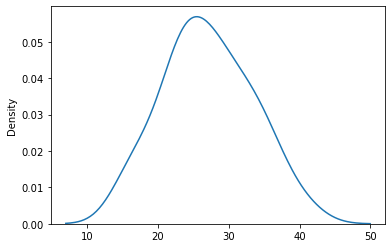

In [314]:
#Q14
mean=30
std=12.5
n=40
a=0.05

stat, p = shapiro(data)

print("The test statistic is", stat," and its p-value is",p)

sb.distplot(data,hist=False)

1.The size of observation is greater than 30
2.The p-value is greater than 0.05 (level of significance) - The sample is normally distributed
3.Std deviation of population is known 

**Z -Stats can be used**

H0:  The product will be delivered within avg 30 days of placing the order,
i.e  𝜇 A = 30

Ha:  The product will be delivered within avg 30 days of placing the order,
i.e  𝜇 A ≠ 30

In [315]:
test=ztest(data,value=30)
p_value=test[1]

In [316]:
if p_value<=a:
    print("The p-value ",round(p_value,4)," is less than ", a," (level of significance) -Hence we reject H0.")
    print("The company's claim is false.")
else:
    print("The p-value ",round(p_value,4) ," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("The company's claim is failed to be false.")

The p-value  0.0028  is less than  0.05  (level of significance) -Hence we reject H0.
The company's claim is false.


The test statistic is 0.9665409922599792  and its p-value is 0.2781541049480438


C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

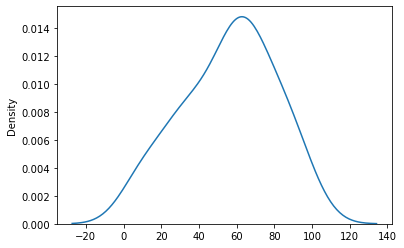

In [317]:
#Q15
data = [81, 89, 53, 56, 77, 58, 78, 45, 62, 55, 72, 8, 10, 16, 8, 33, 36, 32, 66, 62, 48, 84, 67, 91, 62, 46, 89, 99, 92, 77, 29, 66, 44, 26, 66, 67,25, 35, 57, 63]
mean=70
n=40
a=0.05

stat, p = shapiro(data)

print("The test statistic is", stat," and its p-value is",p)

sb.distplot(data,hist=False)


1.The size of observation is greater than 30

2.The p-value is greater than 0.05 (level of significance) - The sample is normally distributed

3.Std deviation of population is unknown 

**T -Stats can be used**

H0: The production cost required for producing a Hollywood movie,
i.e  𝜇 A = 70

Ha:  The production cost required for producing a Hollywood movie,
i.e  𝜇 A ≠ 70

In [318]:
test=ttest_1samp(data,70)
p_value=test[1]

if p_value<=a:
    print("The p-value ",round(p_value,4)," is less than ", a," (level of significance) -Hence we reject H0.")
    print("The company's claim is false.")
else:
    print("The p-value ",round(p_value,4) ," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("The company's claim is failed to be false.")

The p-value  0.0007  is less than  0.05  (level of significance) -Hence we reject H0.
The company's claim is false.


In [319]:
#Q16
Total=155
exp=60
prob=exp/Total
print("The probability that a girl is chosen given that she likes Pizza-",round(prob*100,2),"%")

The probability that a girl is chosen given that she likes Pizza- 38.71 %


In [320]:
#Q17
Total=155
exp=70
prob=exp/Total
print("The probability that a boy likes both the dishes-",round(prob*100,2),"%")

The probability that a boy likes both the dishes- 45.16 %


In [321]:
#Q18
Total=155
exp=65
prob=exp/Total
print("The probability that the favourite dish for both boys and girls is sizzlers-",round(prob*100,2),"%")

The probability that the favourite dish for both boys and girls is sizzlers- 41.94 %


In [322]:
#Q19
Total=155
exp=30
prob=exp/Total
print("The probability that the favourite food is Pizza given that he is a boy-",round(prob*100,2),"%")

The probability that the favourite food is Pizza given that he is a boy- 19.35 %


In [323]:
#Q20
n=36
inc_mean=23.79
sum=inc_mean*n
inc_value=21.32
correct_value=27.32
correct_sum=sum-inc_value+correct_value
correct_mean=correct_sum/n

print("Correct average BMI-",round(correct_mean,2))

Correct average BMI- 23.96


C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


More weight in the left tail of the distribution. - skewness = 0.4455


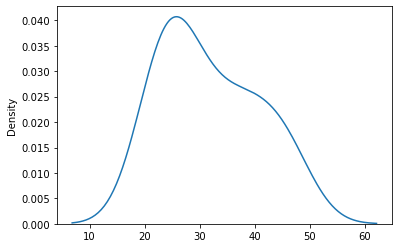

In [324]:
#Q21
age = [22, 29, 24, 32, 37, 26, 25, 45, 28, 22, 39, 47, 23, 36, 43]
n=len(age)
sk=round(skew(age),4)

sb.distplot(age,hist=False)
if sk == 0 : 
    print("Normally distributed.- skewness =",sk)
elif sk > 0 : 
    print("More weight in the left tail of the distribution. - skewness =",sk)
elif sk < 0 : 
    print("More weight in the right tail of the distribution.- skewness =",sk)
    


In [325]:
#Q22
num_clips = [41,35,42,"x",46,34,32,47,44,39]

n=len(num_clips)
num_clips.remove('x')
sum_clips=num_clips
for i in range(0, len(sum_clips)):
    sum_clips[i] = int(sum_clips[i])

mean=40
sum=mean*n

clip=0
for i in sum_clips:
    clip=i+clip

x=sum-clip
print("Missing observation-",x)
num_clips.append(x)

Missing observation- 40


In [326]:
#Q23
height = {'height_(cm)':[162, 158, 149, 167, 162, 154, 172, 160, 164, 159, 175, 163]}
height=pd.DataFrame(height)
Q1=np.quantile(height, .25)
Q3=np.quantile(height, .75)
Range=Q3-Q1
print("The range of height for the middle 50% of the data is-",Range,"=",Q1,"to",Q3)

The range of height for the middle 50% of the data is- 6.0 = 158.75 to 164.75


In [327]:
#24
mean=3.52
std=1.7
sk=-0.46
median=mean -((sk*std)/3)

print("The median rating of the movies : ",round(median,2))

The median rating of the movies :  3.78


In [354]:
#Q25
subscribers={'Month':['Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'July'
,'Aug'
,'Sept'
,'Oct'
,'Nov'
,'Dec'
],
'Sheldon':[3
,5.1
,2.9
,3.7
,4.2
,4.2
,4.3
,5.2
,3.7
,4.4
,5.2
,3.4]
,'Ross':[4
,4.6
,3.1
,4.2
,5.4
,3.4
,5
,6.2
,4.2
,3.5
,4.1
,5.5
]            
,'Joey':[4.3
,4
,4.5
,5.1
,6
,5
,4.8
,5.4
,5.1
,6.4
,4.2
,3.4
]}


subscribers=pd.DataFrame(subscribers)
std_sheldon=np.std(subscribers['Sheldon'])
mean_sheldon=np.mean(subscribers['Sheldon'])
cv_sheldon=std_sheldon/mean_sheldon
print("Coefficient of Variation of Sheldon",round(cv_sheldon,3))

std_Ross=np.std(subscribers['Ross'])
mean_Ross=np.mean(subscribers['Ross'])
cv_Ross=std_Ross/mean_Ross
print("Coefficient of Variation of Ross",round(cv_Ross,3))


std_Joey=np.std(subscribers['Joey'])
mean_Joey=np.mean(subscribers['Joey'])
cv_Joey=std_Joey/mean_Joey
print("Coefficient of Variation of Joey",round(cv_Joey,3))


print("consistency in the number of new subscribers - Joey ",round(cv_Joey,3))



Coefficient of Variation of Sheldon 0.186
Coefficient of Variation of Ross 0.202
Coefficient of Variation of Joey 0.167
consistency in the number of new subscribers - Joey  0.167


In [328]:
#Q26
data={"Diameter_of_bolts": [0.89, 1.39, 1.29, 1.36, 1.39, 1.44, 1.24, 0.82, 1.25, 0.85, 0.75, 1.34, 0.84, 1.27, 1.04, 1.36, 1.18, 1.49, 1.54, 0.83, 1.11, 1.14, 1.3 , 0.99, 1.21, 1.51, 1.02, 1.19, 1.05, 1.23, 0.76, 0.81, 0.92, 0.82, 1.64, 1.02, 1.61, 1.2, 1.17, 1.61, 1.23, 1.11, 1.17, 1.63, 1.33, 1.07, 0.94, 1.53, 1.38, 0.8 , 0.95, 1.4 , 1.09, 1.32, 1.43, 1.12, 1.2 , 0.94, 0.98, 1.54, 1.21, 1.4 , 1.13, 0.75, 1.02, 0.99, 1.49, 1.34, 1.57, 1.51, 1.42, 1.27, 0.78, 1.52, 1.5 , 1.13, 1.17, 1.17, 1.21, 1.14, 1.23, 1.46, 1.62, 1.11, 1.28, 1.25, 1.48, 0.76, 1.45, 1.38, 1.15, 0.95, 1.13, 1.24, 1.41, 1.38, 0.86, 1.39, 1.57, 1.32, 1.43, 1.55, 0.89, 1.06, 1.27, 1.46, 0.94, 1.53, 0.87, 1.47, 1.04, 1.12, 1.09, 1.45, 1.37, 1.18, 1.22, 1.29, 1.28, 1.59, 1.06, 1.49, 1.01, 1.31, 1.21, 1.32, 1.59, 0.85, 1.06, 0.82, 1.31, 1.32, 1.05, 1.6 , 0.87, 0.85, 1.13, 1.55, 1.15, 1.11, 1.58, 1.47, 1.52, 1.31, 1.16, 1.12, 0.85, 1.61, 1.42, 1.61]}
mean=1.25
bolt=pd.DataFrame(data)
n=len(bolt)
a=.05

1.The size of observation is greater than 30 
2.The p-value is greater than 0.05 (level of significance) - The sample is normally distributed 
3.Std deviation of population is unknown

T -Stats can be used

H0: The average diameter is not 1.25 cm, i.e  𝜇 A = 1.25

Ha: The average diameter is  1.25 cm, i.e 𝜇 A ≠ 1.25

C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The p-value  [0.18947737]  is greater than  0.05  (level of significance) -Hence we failed to reject H0.
The company's claim is failed to be false.


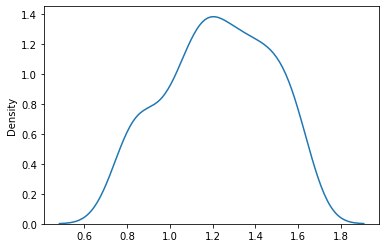

In [329]:
test=ttest_1samp(bolt,1.25)
p_value=test[1]
sb.distplot(bolt,hist=False)
if p_value<=a:
    print("The p-value ",p_value," is less than ", a," (level of significance) -Hence we reject H0.")
    print("The company's claim is false.")
else:
    print("The p-value ",p_value," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("The company's claim is failed to be false.")

In [330]:
#Q27
bp={'Before':[90,85,78,88,90,100,92,81],'After':[85,87,82,83,82,99,94,78]}
bp=pd.DataFrame(bp)
a=0.05

1.The size of observation is less than 30 

2.The p-value is greater than 0.05 (level of significance) - The sample is normally distributed 

3.Std deviation of population is unknown

T -Stats can be used

H0: The BP of  patients before medication and after medication are same, i.e 𝜇 A = 𝜇 B

Ha: The BP of  patients before medication and after medication are not same, i.e 𝜇 A ≠ 𝜇 B

C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The p-value  0.27713277282901  is greater than  0.05  (level of significance) -Hence we failed to reject H0.
The data suggest that the drug is not effective in reducing the systolic blood pressure


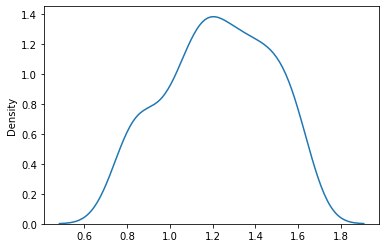

In [331]:
test=ttest_rel(bp['Before'],bp['After'])
p_value=test[1]
sb.distplot(bolt,hist=False)
if p_value<=a:
    print("The p-value ",p_value," is less than ", a," (level of significance) -Hence we reject H0.")
    print("The data suggest that the drug is effective in reducing the systolic blood pressure")
else:
    print("The p-value ",p_value," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("The data suggest that the drug is not effective in reducing the systolic blood pressure")

In [336]:
#Q28
yeild={'Yield due to Ordinary Seed':[450, 340, 562, 563, 234, 546, 876, 649, 736, 745],'Yield due to Modified Seed':[345, 576, 675, 674, 865, 457, 776, 567, 568, 753]}
yeild=pd.DataFrame(yeild)
a=0.05

1.The size of observation is less than 30

2.The p-value is greater than 0.05 (level of significance) - The sample is normally distributed

3.Std deviation of population is unknown

T -Stats can be used

H0: The there is no difference in the yeild due to the seed type, i.e 𝜇 A = 𝜇 B

Ha: The there is  difference in the yeild due to the seed type, i.e 𝜇 A ≠ 𝜇 B

C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The p-value  0.4892561782804804  is greater than  0.05  (level of significance) -Hence we failed to reject H0.
There is no difference in the yeild due to the seed type


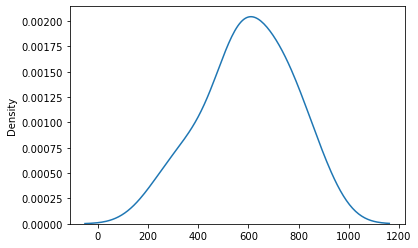

In [339]:
test=ttest_ind(yeild['Yield due to Ordinary Seed'],yeild['Yield due to Modified Seed'])
p_value=test[1]
sb.distplot(yeild,hist=False)
if p_value<=a:
    print("The p-value ",p_value," is less than ", a," (level of significance) -Hence we reject H0.")
    print("There is difference in the yeild due to the seed type")
else:
    print("The p-value ",p_value," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("There is no difference in the yeild due to the seed type")

C:\Users\Ajit Jain\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


The test statistic is 0.9539097547531128  and its p-value is 2.4845021772479007e-42
The p-value  2.4845021772479007e-42  is less than  0.05  (level of significance) -Hence we reject H0.
The data is not normally distributed


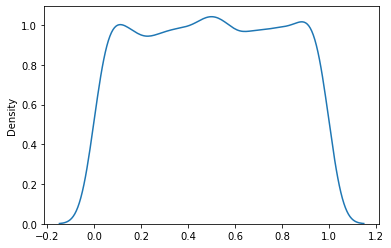

In [332]:
#Q29
data=np.random.random(7000)
a=0.05
stat,p = shapiro(data)
print("The test statistic is", stat," and its p-value is",p)

sb.distplot(data,hist=False)
if p<=a:
    print("The p-value ",p," is less than ", a," (level of significance) -Hence we reject H0.")
    print("The data is not normally distributed")
else:
    print("The p-value ",p," is greater than ",a," (level of significance) -Hence we failed to reject H0.")
    print("The data is normally distributed")

Since the p-value (0.00) is less than 0.05 (level of significance), hence we reject H0.
We may conclude that the data is not normally distributed

In [333]:
#Q30
print("The probability that steve will pass-",round(((stats.binom.pmf(2,8,0.25))*100),2),"%")

AttributeError: 'numpy.float64' object has no attribute 'binom'